In [27]:
# math 
import numpy as np
from scipy.linalg import norm

# random
from numpy.random import rand, randn
np.random.seed(6)

# plotting
import matplotlib.pyplot as plt

# robust regression 
from sklearn.linear_model import LinearRegression, QuantileRegressor, Lasso, Ridge, HuberRegressor

In [28]:
# plot line y = w*x+b
def plotline(w, xmin=-100,xmax=100,nsamples=100,label=''):
    x = np.linspace(xmin, xmax, nsamples)
    y = w[0] * x + w[1]
    plt.plot(x, y, color='k', label=label)
    plt.legend(loc="upper left")
    plt.grid()

In [29]:
# plot function y = f(x)
def plotfunc(f, xmin=-100,xmax=100,nsamples=100,label=""):
    x = np.linspace(xmin, xmax, nsamples)
    y = f(x)
    plt.plot(x, y, color='k', label=label)
    plt.legend(loc="upper left")
    plt.grid()

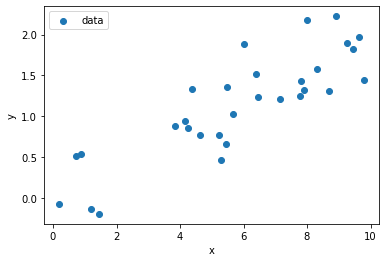

In [30]:
# Generate and plot data
np.random.seed(0)
n = 30

def sample_data(num_points):
    x = rand(num_points)*10
    y = .2*x + .3*randn(num_points)
    return x,y

x,y = sample_data(n)

"""function to plot the above data"""
def plotdata(x=x,y=y, margin=.05):
    plt.scatter(x,y, label="data")
    plt.legend(loc="upper left")
    plt.xlabel("x") 
    plt.ylabel("y")     
    range_y = np.max(y) - np.min(y)
    range_x = np.max(x) - np.min(x)
    plt.ylim([np.min(y)-margin*range_y,np.max(y)+margin*range_y])
    plt.xlim([np.min(x)-margin*range_x,np.max(x)+margin*range_x])
    
plotdata()

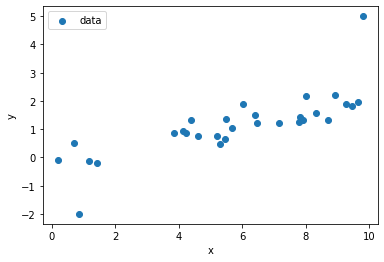

In [31]:
# mess up the data
outliers = True
if outliers:
    y[20] = 5
    y[15] = -2

plotdata()

Least squares will fit inliers _______ than Huber regression 
* A) better 
* B) worse

Least squares will fit outliers _______ than Huber regression 
* A) better 
* B) worse

# Least squares

In [32]:
# X = vcat(x ones(length(x))]
X = x.reshape(-1,1)
lin = LinearRegression(fit_intercept=True).fit(X,y)
w_quad = [lin.coef_[0], lin.intercept_]
w_quad

[0.30576127701199385, -0.6102904304198062]

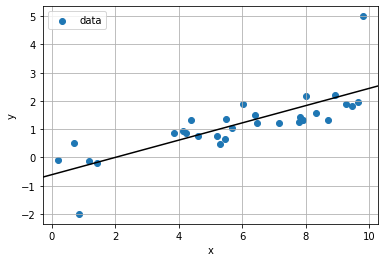

In [33]:
# plot the fit
plotdata()
plotline(w_quad)

In [34]:
np.mean(y - lin.predict(X))

-2.535009239560774e-16

In [35]:
np.median(y - lin.predict(X))

-0.06276304347967676

# ℓ_1 regression

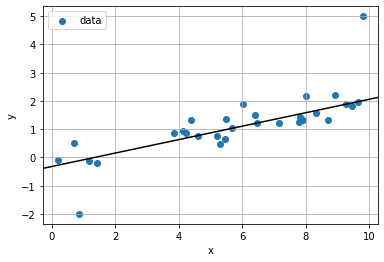

In [36]:
l1 = QuantileRegressor(quantile=.5, fit_intercept=True, alpha=0).fit(X,y)
w_l1 = [l1.coef_[0], l1.intercept_]

# plot the fit
plotdata()
plotline(w_l1)

In [37]:
np.mean(y - l1.predict(X))

0.1036974185259609

In [38]:
np.median(y - l1.predict(X))

3.845146423486767e-12

In [ ]:
# Quantile regression

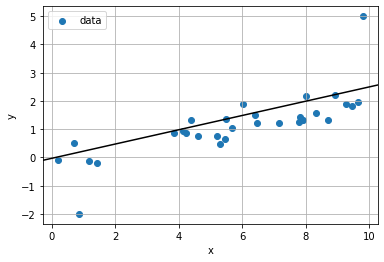

In [53]:
q = .8
quantile = QuantileRegressor(quantile=q, fit_intercept=True, alpha=0).fit(X,y)
w_quantile = [quantile.coef_[0], quantile.intercept_]

# plot the fit
plotdata()
plotline(w_quantile)

In [54]:
np.mean(y - quantile.predict(X))

-0.27211613802894624

In [55]:
np.median(y - quantile.predict(X))

-0.3906153070161097

In [56]:
np.quantile(y - quantile.predict(X), q)

2.288787692705806e-09

# Huber regression

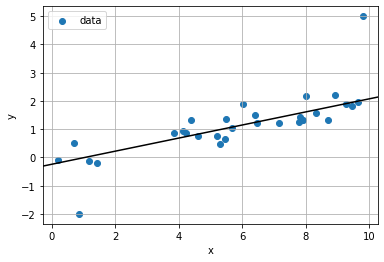

In [40]:
huber = HuberRegressor(fit_intercept=True, alpha=0).fit(X,y)
w_huber = [huber.coef_[0], huber.intercept_]

# plot the fit
plotdata()
plotline(w_huber)

In [41]:
np.mean(y - huber.predict(X))

0.06140586728499734

In [42]:
np.median(y - huber.predict(X))

-0.03137143891216554

In [58]:
hcat(w_quad, w_l1, w_huber, w_quantile)

NameError: name 'hcat' is not defined

# Plot quantiles of distribution

In [ ]:
q = .1
l = QuantileLoss(quantile=q)
w_nocov = proxgrad(1/n*l, ZeroReg(), ones(n,1), y, stepsize=.9, maxiters=50)

scatter(y, zeros(n), axis = nothing, shape=:x, label="data")
scatter!([w_nocov], [0], color = :red, shape=:square, label="$(q)th quantile") 
ylims!((-1,1))
m,M = minimum(y), maximum(y)
xlims!((minimum(y)-(M-m)/10, maximum(y)+(M-m)/10))
# arrow(0, 0, maximum(y)+(M-m)/20, 0, head_width=0.05, head_length=0.1, fc="k", ec="k")
# arrow(0, 0, minimum(y)-(M-m)/20, 0, head_width=0.05, head_length=0.1, fc="k", ec="k")
# savefig("quantile_$(q).pdf")